In [4]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Abrimos el archivo 'Estadisticas consultas catálogo-reportresults.csv' que contiene los datos de la busqueda de los usuarios en el sistema Koha
data_frame = pd.read_csv("d:/Users/Laura/Desktop/Espacio Integrador II/3 - Practica Academica/Practica-Acad-mica/1 - archivos/Estadísticas consultas catálogo-reportresults.csv", sep=';')


### Observamos la estructura del archivo
##### Primer contacto con los datos

In [6]:
# Vemos los primeros datos del archivo
data_frame.head()

,sessionid,query_desc,type,total,time,branchcode,categorycode
0,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:27:49,FING,DOCENTE
1,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: bronzino",biblio,16,2018-10-17 15:28:25,FING,DOCENTE
2,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:29:51,FING,DOCENTE
3,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:02,FING,DOCENTE
4,8b973f78de404b6eb6548e4a229cb725,"au,wrdl: webster",biblio,10,2018-10-17 15:30:13,FING,DOCENTE


In [7]:
# Consultamos los tipos de variable de cada columna
print(data_frame.dtypes)

sessionid       object
query_desc      object
type            object
total            int64
time            object
branchcode      object
categorycode    object
dtype: object


In [8]:
# Vemos las medidas estadisticas basicas para la variable 'total'
print("Estadísticas descriptivas de la columna 'total':")
data_frame['total'].describe()

Estadísticas descriptivas de la columna 'total':


count     2535.000000
mean       190.157791
std        820.385073
min          0.000000
25%          2.000000
50%          7.000000
75%         33.000000
max      11525.000000
Name: total, dtype: float64

In [9]:
# Nos fijamos la cantidad de veces que el sistema no encontró ningun material con la busqueda ingresada por el usuario
cero_resultados = data_frame[data_frame['total'] == 0]
print(f"Las búsquedas totales que no tuvieron ningun resultado son: {len(cero_resultados)}")

print(f"Esto representa un porcentaje del {round((len(cero_resultados) / len(data_frame))*100, 2)} %")

Las búsquedas totales que no tuvieron ningun resultado son: 317
Esto representa un porcentaje del 12.5 %


In [10]:
# Buscamos el valor maximo de resultados que logro devolver el sistema
max_resultados = data_frame['total'].max()
print(f"Máximo de resultados que encontró el sistema: {max_resultados}")

# Encontramos el usuario que realizo esta busqueda
data_frame[data_frame['total'] == max_resultados]

Máximo de resultados que encontró el sistema: 11525


,sessionid,query_desc,type,total,time,branchcode,categorycode
1394,7a7a070b4c157d901bc30c69555b7dfa,"kw,wrdl: c++,",biblio,11525,2022-11-01 11:30:25,FING,BIBLIOTECA


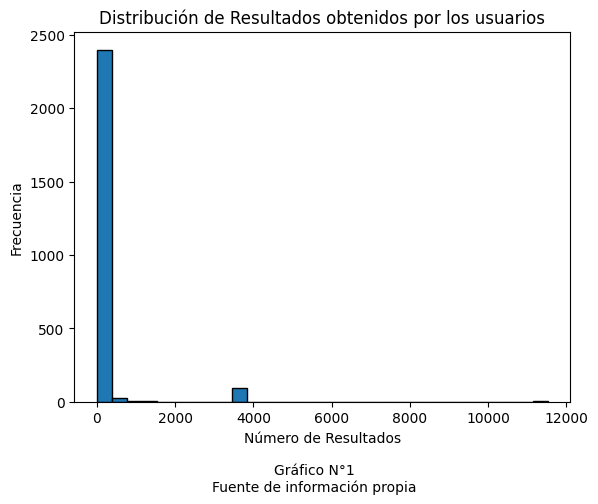

In [11]:
# Histograma de la columna 'total'
plt.hist(data_frame['total'], bins=30, edgecolor='black')
plt.title('Distribución de Resultados obtenidos por los usuarios')
plt.figtext(0.5, -0.05, 'Gráfico N°1\nFuente de información propia', ha='center', va='center')
plt.xlabel('Número de Resultados')
plt.ylabel('Frecuencia')
plt.show()